# [第6章: 機械学習](https://nlp100.github.io/ja/ch06.html)
本章では，Fabio Gasparetti氏が公開している[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)を用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

## [50. データの入手・整形](https://nlp100.github.io/ja/ch06.html#50-%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%85%A5%E6%89%8B%E6%95%B4%E5%BD%A2)
[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)をダウンロードし、以下の要領で学習データ（`train.txt`），検証データ（`valid.txt`），評価データ（`test.txt`）を作成せよ．
1. ダウンロードしたzipファイルを解凍し，`readme.txt`の説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれ`train.txt`，`valid.txt`，`test.txt`というファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
!ls Input/newsCorpora.csv

Input/newsCorpora.csv


In [2]:
import pandas as pd

In [3]:
# 2.
df = pd.read_table("Input/newsCorpora.csv",
                   names=("ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"),
                   quoting=3)
df = df[df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"])]
df.head(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


In [4]:
# 3.
df = df.sample(frac=1, random_state=50).reset_index(drop=True)
df.head(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,290630,Report: Ukraine president proposing cease-fire,http://www.businessweek.com/ap/2014-06-16/repo...,Businessweek,b,ddj5NjVPliMvgHMxoJt8jgDPRCu4M,www.businessweek.com,1402927990143
1,1882,Gas up 2 cents in Rhode Island to $3.57 a gallon,http://www.businessweek.com/ap/2014-03-10/gas-...,Businessweek,t,dQ1hBSN6YmfxF9Mwn5_M8L421ikbM,www.businessweek.com,1394511426338
2,357017,GLOBAL MARKETS-World stocks hold at all-time h...,http://www.reuters.com/article/2014/07/04/mark...,Reuters,b,d4CAA3sZwGJo-lMLgwwsVuqKsBvVM,www.reuters.com,1404520680866
3,173855,American dollar hits a wall as China prepares ...,http://www.dailymail.co.uk/news/article-261680...,Daily Mail,b,dW6XF7JpT9ZPxCMYR-8h8rlx4PQfM,www.dailymail.co.uk,1398869352646
4,175976,"With The ""Episode VIi"" Cast, JJ Abrams Is Bank...",http://www.contactmusic.com/article/star-wars-...,Contactmusic.com,e,dcM-0hWNTH6q4MMXsh0qF0FQcc2IM,www.contactmusic.com,1398881678390


In [5]:
# 4.
row = len(df)

df_train = df[:int(row*0.8)][["CATEGORY", "TITLE"]]
df_train.to_csv("Output/Chapter06/train.txt", sep="\t", header=False, index=False)

df_valid = df[int(row*0.8):int(row*0.9)][["CATEGORY", "TITLE"]]
df_valid.to_csv("Output/Chapter06/valid.txt", sep="\t", header=False, index=False)

df_test = df[int(row*0.9):][["CATEGORY", "TITLE"]]
df_test.to_csv("Output/Chapter06/test.txt", sep="\t", header=False, index=False)

In [6]:
args = (row, len(df_train), len(df_valid), len(df_test))
"total:%d, train:%d, valid:%d, test:%d" % args

'total:13356, train:10684, valid:1336, test:1336'

## [51. 特徴量抽出](https://nlp100.github.io/ja/ch06.html#51-%E7%89%B9%E5%BE%B4%E9%87%8F%E6%8A%BD%E5%87%BA)
学習データ，検証データ，評価データから特徴量を抽出し，それぞれ`train.feature.txt`，`valid.feature.txt`，`test.feature.txt`というファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [7]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [8]:
# 記事の見出しの単語列から、ストップワード除去後にステミング処理したものを、ここでの特徴量とする
stop_words = list(ENGLISH_STOP_WORDS)
porter = PorterStemmer()

In [9]:
def extract_features(file_type: str):
    if file_type != "train" and file_type != "valid" and file_type != "test":
        raise ValueError("file_type:%s" % file_type)

    in_path = "Output/Chapter06/%s.txt" % file_type
    out_path = "Output/Chapter06/%s.feature.txt" % file_type

    with open(in_path) as f, open(out_path, "w") as f_feature:
        for line in f:
            words = []

            for word in line.split("\t")[1].split():
                if word not in stop_words:
                    words.append(porter.stem(word))

            args = (line.split("\t")[0], " ".join(words))
            f_feature.write("%s\t%s\n" % args)

In [10]:
%%time
extract_features("train")
extract_features("valid")
extract_features("test")

CPU times: user 1.95 s, sys: 3.53 ms, total: 1.96 s
Wall time: 1.96 s


## [52. 学習](https://nlp100.github.io/ja/ch06.html#52-%E5%AD%A6%E7%BF%92)
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [12]:
# ここでは、tf-idfによるベクトル化により、コーパスから学習データを作成
X_train, y_train, tf_idf = None, None, TfidfVectorizer()

with open("Output/Chapter06/train.feature.txt") as f:
    labels, features = [], []

    for line in f:
        elements = line.split("\t")
        labels.append(elements[0])
        features.append(elements[1].replace("\n", ""))

    tf_idf.fit(features)
    X_train = tf_idf.transform(features)
    y_train = np.array(labels)

In [13]:
X_train

<10684x10785 sparse matrix of type '<class 'numpy.float64'>'
	with 91587 stored elements in Compressed Sparse Row format>

In [14]:
y_train.shape

(10684,)

In [15]:
%%time
model_52 = LogisticRegression(max_iter=1000, random_state=52)
model_52.fit(X_train, y_train)

CPU times: user 2.22 s, sys: 2.36 s, total: 4.58 s
Wall time: 1.17 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## [53. 予測](https://nlp100.github.io/ja/ch06.html#53-%E4%BA%88%E6%B8%AC)
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [16]:
def calc_category_prediction(title: str):
    X = tf_idf.transform([title])
    pred = model_52.predict(X)[0]
    probs = model_52.predict_proba(X)[0]
    return pred, max(probs)

In [17]:
with open("Output/Chapter06/train.feature.txt") as f:
    for i, line in enumerate(f):
        if i == 10:
            break

        elements = line.split("\t")
        label = elements[0]
        title = elements[1].replace("\n", "")
        pred, prob = calc_category_prediction(title)

        print(title)
        print(" -> Label:%s" % label)
        print(" -> Predict:%s" % pred)
        print(" -> Probability:%f%%" % (prob*100.0))
        print()

report: ukrain presid propos cease-fir
 -> Label:b
 -> Predict:b
 -> Probability:87.179122%

ga 2 cent rhode island $3.57 gallon
 -> Label:t
 -> Predict:t
 -> Probability:45.728191%

global markets-world stock hold all-tim high bumper week
 -> Label:b
 -> Predict:b
 -> Probability:92.318818%

american dollar hit wall china prepar leap place world' ...
 -> Label:b
 -> Predict:b
 -> Probability:90.112721%

"with the ""episod vii"" cast, JJ abram Is bank On emerg young talent ..."
 -> Label:e
 -> Predict:e
 -> Probability:84.046417%

jame franco - jame franco laugh off instagram controversi In saturday ...
 -> Label:e
 -> Predict:e
 -> Probability:89.745006%

miley cyru sit topless get blond hair trim reveal flashback ...
 -> Label:e
 -> Predict:e
 -> Probability:93.813616%

robert pattinson - robert pattinson homeless
 -> Label:e
 -> Predict:e
 -> Probability:87.316650%

yahoo! keep win with alibaba (and lose everywher else)
 -> Label:t
 -> Predict:e
 -> Probability:48.087043%

powerad d

## [54. 正解率の計測](https://nlp100.github.io/ja/ch06.html#54-%E6%AD%A3%E8%A7%A3%E7%8E%87%E3%81%AE%E8%A8%88%E6%B8%AC)
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
X_test, y_test = None, None

with open("Output/Chapter06/test.feature.txt") as f:
    features, labels = [], []

    for line in f:
        elements = line.split("\t")
        label = elements[0]
        title = elements[1].replace("\n", "")
        features.append(title)
        labels.append(label)

    X_test = tf_idf.transform(features)
    y_test = np.array(labels)

In [20]:
accuracy_train = model_52.score(X_train, y_train) * 100.0
accuracy_test = model_52.score(X_test, y_test) * 100.0

args = (accuracy_train, accuracy_test)
print("Accuracy(Train):%f%%, Accuracy(Test):%f%%" % args)

Accuracy(Train):94.440285%, Accuracy(Test):89.296407%


## [55. 混同行列の作成](https://nlp100.github.io/ja/ch06.html#55-%E6%B7%B7%E5%90%8C%E8%A1%8C%E5%88%97%E3%81%AE%E4%BD%9C%E6%88%90)
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [22]:
%matplotlib inline

In [23]:
sns.set(style="darkgrid", context="notebook", palette="muted")

In [24]:
%%time
y_pred_train = None

with open("Output/Chapter06/train.feature.txt") as f:
    preds = []

    for line in f:
        title = line.split("\t")[1].replace("\n", "")
        pred, _ = calc_category_prediction(title)
        preds.append(pred)
    
    y_pred_train = np.array(preds)

CPU times: user 8.97 s, sys: 5.23 ms, total: 8.98 s
Wall time: 8.98 s


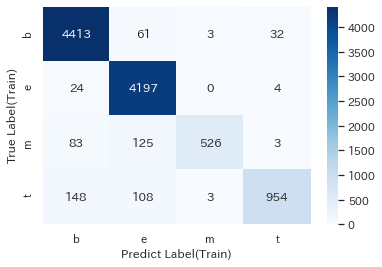

In [25]:
cm_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
                     columns=np.unique(y_train),
                     index=np.unique(y_train))
cm_train.index.name = "True Label(Train)"
cm_train.columns.name = "Predict Label(Train)"
sns.heatmap(cm_train, annot=True, cmap="Blues", fmt="d")

In [26]:
%%time
y_pred_test = None

with open("Output/Chapter06/test.feature.txt") as f:
    preds = []

    for line in f:
        title = line.split("\t")[1].replace("\n", "")
        pred, _ = calc_category_prediction(title)
        preds.append(pred)
    
    y_pred_test = np.array(preds)

CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.13 s


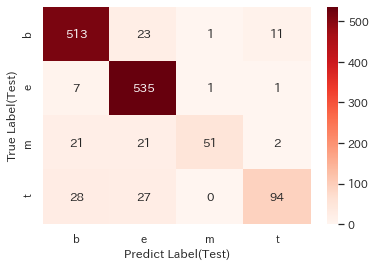

In [27]:
cm_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
                     columns=np.unique(y_test),
                     index=np.unique(y_test))
cm_test.index.name = "True Label(Test)"
cm_test.columns.name = "Predict Label(Test)"
sns.heatmap(cm_test, annot=True, cmap="Reds", fmt="d")

## [56. 適合率，再現率，F1スコアの計測](https://nlp100.github.io/ja/ch06.html#56-%E9%81%A9%E5%90%88%E7%8E%87%E5%86%8D%E7%8F%BE%E7%8E%87f1%E3%82%B9%E3%82%B3%E3%82%A2%E3%81%AE%E8%A8%88%E6%B8%AC)
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred_test, labels=["b", "e"]))

              precision    recall  f1-score   support

           b       0.90      0.94      0.92       548
           e       0.88      0.98      0.93       544

   micro avg       0.89      0.96      0.92      1092
   macro avg       0.89      0.96      0.92      1092
weighted avg       0.89      0.96      0.92      1092



In [30]:
print(classification_report(y_test, y_pred_test, labels=["b", "m"]))

              precision    recall  f1-score   support

           b       0.90      0.94      0.92       548
           m       0.96      0.54      0.69        95

   micro avg       0.91      0.88      0.89       643
   macro avg       0.93      0.74      0.80       643
weighted avg       0.91      0.88      0.88       643



In [31]:
print(classification_report(y_test, y_pred_test, labels=["b", "t"]))

              precision    recall  f1-score   support

           b       0.90      0.94      0.92       548
           t       0.87      0.63      0.73       149

   micro avg       0.90      0.87      0.88       697
   macro avg       0.89      0.78      0.83       697
weighted avg       0.89      0.87      0.88       697



In [32]:
print(classification_report(y_test, y_pred_test, labels=["e", "m"]))

              precision    recall  f1-score   support

           e       0.88      0.98      0.93       544
           m       0.96      0.54      0.69        95

   micro avg       0.89      0.92      0.90       639
   macro avg       0.92      0.76      0.81       639
weighted avg       0.89      0.92      0.89       639



In [33]:
print(classification_report(y_test, y_pred_test, labels=["e", "t"]))

              precision    recall  f1-score   support

           e       0.88      0.98      0.93       544
           t       0.87      0.63      0.73       149

   micro avg       0.88      0.91      0.89       693
   macro avg       0.88      0.81      0.83       693
weighted avg       0.88      0.91      0.89       693



In [34]:
print(classification_report(y_test, y_pred_test, labels=["m", "t"]))

              precision    recall  f1-score   support

           m       0.96      0.54      0.69        95
           t       0.87      0.63      0.73       149

   micro avg       0.90      0.59      0.72       244
   macro avg       0.92      0.58      0.71       244
weighted avg       0.91      0.59      0.72       244



## [57. 特徴量の重みの確認](https://nlp100.github.io/ja/ch06.html#57-%E7%89%B9%E5%BE%B4%E9%87%8F%E3%81%AE%E9%87%8D%E3%81%BF%E3%81%AE%E7%A2%BA%E8%AA%8D)
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [35]:
indices = np.argsort(model_52.coef_[0])
indices.shape

(10785,)

In [36]:
print("[Best 10 Features]")
for i in range(-1, -11, -1):
    best_idx = indices[i]
    best_feature = [k for k, v in tf_idf.vocabulary_.items() if v == best_idx]

    args = (-i, best_feature[0], model_52.coef_[0][best_idx])
    print("No.%s\t: %s\t(coef=%f)" % args)

[Best 10 Features]
No.1	: bank	(coef=3.705186)
No.2	: fed	(coef=3.402060)
No.3	: china	(coef=3.387817)
No.4	: ecb	(coef=3.051126)
No.5	: euro	(coef=2.730670)
No.6	: stock	(coef=2.607249)
No.7	: profit	(coef=2.591152)
No.8	: dollar	(coef=2.564355)
No.9	: ukrain	(coef=2.509525)
No.10	: updat	(coef=2.470160)


In [37]:
print("[Worst 10 Features]")
for i in range(10):
    worst_idx = indices[i]
    worst_feature = [k for k, v in tf_idf.vocabulary_.items() if v == worst_idx]

    args = (i+1, worst_feature[0], model_52.coef_[0][worst_idx])
    print("No.%s\t: %s\t(coef=%f)" % args)

[Worst 10 Features]
No.1	: the	(coef=-2.217059)
No.2	: and	(coef=-2.000252)
No.3	: of	(coef=-1.937303)
No.4	: ebola	(coef=-1.752573)
No.5	: googl	(coef=-1.739170)
No.6	: kardashian	(coef=-1.703979)
No.7	: star	(coef=-1.641904)
No.8	: in	(coef=-1.609478)
No.9	: facebook	(coef=-1.578345)
No.10	: aereo	(coef=-1.572312)


## [58. 正則化パラメータの変更](https://nlp100.github.io/ja/ch06.html#58-%E6%AD%A3%E5%89%87%E5%8C%96%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%81%AE%E5%A4%89%E6%9B%B4)
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [39]:
X_valid, y_valid = None, None

with open("Output/Chapter06/valid.feature.txt") as f:
    features, labels = [], []

    for line in f:
        elements = line.split("\t")
        label = elements[0]
        title = elements[1].replace("\n", "")
        features.append(title)
        labels.append(label)

    X_valid = tf_idf.transform(features)
    y_valid = np.array(labels)

In [58]:
%%time
regularizations = [10.0**exponent for exponent in range(-3, 4)]
accuracies_train, accuracies_valid, accuracies_test = [], [], []

print("[LogisticRegression]")
for regularization in regularizations:
    model = LogisticRegression(C=1.0/regularization, max_iter=1000, random_state=58)
    model.fit(X_train, y_train)

    accuracy_train = model.score(X_train, y_train) * 100.0
    accuracies_train.append(accuracy_train)
    accuracy_valid = model.score(X_valid, y_valid) * 100.0
    accuracies_valid.append(accuracy_valid)
    accuracy_test = model.score(X_test, y_test) * 100.0
    accuracies_test.append(accuracy_test)

    args = (regularization, accuracy_train, accuracy_valid, accuracy_test)
    print("regularization:%f, train:%f%%, valid:%f%%, test:%f%%" % args)

[LogisticRegression]
regularization:0.001000, train:99.962561%, valid:91.766467%, test:91.092814%
regularization:0.010000, train:99.962561%, valid:91.841317%, test:91.392216%
regularization:0.100000, train:99.803444%, valid:91.541916%, test:91.616766%
regularization:1.000000, train:94.440285%, valid:88.922156%, test:89.296407%
regularization:10.000000, train:79.361662%, valid:78.368263%, test:78.293413%
regularization:100.000000, train:77.115313%, valid:75.898204%, test:77.245509%
regularization:1000.000000, train:43.813179%, valid:45.134731%, test:42.589820%
CPU times: user 22 s, sys: 24.7 s, total: 46.7 s
Wall time: 11.7 s


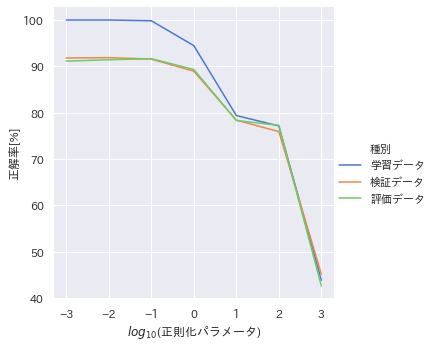

In [59]:
df_58 = pd.DataFrame({
        "$log_{10}$(正則化パラメータ)": np.log10(np.tile(regularizations, 3)),
        "正解率[%]": np.concatenate((accuracies_train, accuracies_valid, accuracies_test)),
        "種別": np.concatenate((np.tile("学習データ", 7), np.tile("検証データ", 7), np.tile("評価データ", 7))),
})
sns.relplot(x="$log_{10}$(正則化パラメータ)", y="正解率[%]", hue="種別", data=df_58, kind="line")

## [59. ハイパーパラメータの探索](https://nlp100.github.io/ja/ch06.html#59-%E3%83%8F%E3%82%A4%E3%83%91%E3%83%BC%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%81%AE%E6%8E%A2%E7%B4%A2)
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [68]:
from itertools import product
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import LinearSVC

In [72]:
%%time
Cs = [10.0**exponent for exponent in range(-2, 3)]
gammas = [10.0**exponent for exponent in range(-2, 3)]
best_param = {"accuracy": 0.0, "C": -1.0, "gamma": -1.0, "classifier": None}

# 0-1の間にスケール
scaler = MaxAbsScaler().fit(X_train)

# 多クラスSVM(one-vs-rest)
print("[LinearSVC]")
for C, gamma in product(Cs, gammas):
    model = SVC(C=C, kernel='rbf', gamma=gamma, random_state=59)
    classifier = OneVsRestClassifier(model)
    classifier.fit(scaler.transform(X_train), y_train)
    accuracy = classifier.score(scaler.transform(X_valid), y_valid) * 100.0

    args = (C, gamma, accuracy)
    print("C:%0.2f, gamma:%0.2f, valid:%f%%" % args)
    
    if best_param["accuracy"] < accuracy:
        best_param["accuracy"] = accuracy
        best_param["C"] = C
        best_param["gamma"] = gamma
        best_param["classifier"] = classifier

best_param

[LinearSVC]
C:0.01, gamma:0.01, valid:77.020958%
C:0.01, gamma:0.10, valid:76.197605%
C:0.01, gamma:1.00, valid:64.221557%
C:0.01, gamma:10.00, valid:44.311377%
C:0.01, gamma:100.00, valid:44.311377%
C:0.10, gamma:0.01, valid:77.020958%
C:0.10, gamma:0.10, valid:78.068862%
C:0.10, gamma:1.00, valid:64.221557%
C:0.10, gamma:10.00, valid:44.311377%
C:0.10, gamma:100.00, valid:44.311377%
C:1.00, gamma:0.01, valid:81.362275%
C:1.00, gamma:0.10, valid:90.344311%
C:1.00, gamma:1.00, valid:63.398204%
C:1.00, gamma:10.00, valid:44.386228%
C:1.00, gamma:100.00, valid:44.311377%
C:10.00, gamma:0.01, valid:91.766467%
C:10.00, gamma:0.10, valid:92.739521%
C:10.00, gamma:1.00, valid:65.793413%
C:10.00, gamma:10.00, valid:44.461078%
C:10.00, gamma:100.00, valid:44.311377%
C:100.00, gamma:0.01, valid:92.140719%
C:100.00, gamma:0.10, valid:92.739521%
C:100.00, gamma:1.00, valid:65.793413%
C:100.00, gamma:10.00, valid:44.461078%
C:100.00, gamma:100.00, valid:44.311377%
CPU times: user 34min 51s, sys: 6

{'accuracy': 92.73952095808383,
 'C': 10.0,
 'gamma': 0.1,
 'classifier': OneVsRestClassifier(estimator=SVC(C=10.0, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=3,
                                   gamma=0.1, kernel='rbf', max_iter=-1,
                                   probability=False, random_state=59,
                                   shrinking=True, tol=0.001, verbose=False),
                     n_jobs=None)}

In [74]:
%%time
args = (
    best_param["classifier"].score(scaler.transform(X_train), y_train) * 100.0,
    best_param["classifier"].score(scaler.transform(X_valid), y_valid) * 100.0,
    best_param["classifier"].score(scaler.transform(X_test), y_test) * 100.0,
)
"[Best Accuracy] train:%f%%, valid:%f%%, test:%f%%" % args

CPU times: user 20.4 s, sys: 16.3 ms, total: 20.4 s
Wall time: 20.4 s


'[Best Accuracy] train:99.953201%, valid:92.739521%, test:92.440120%'